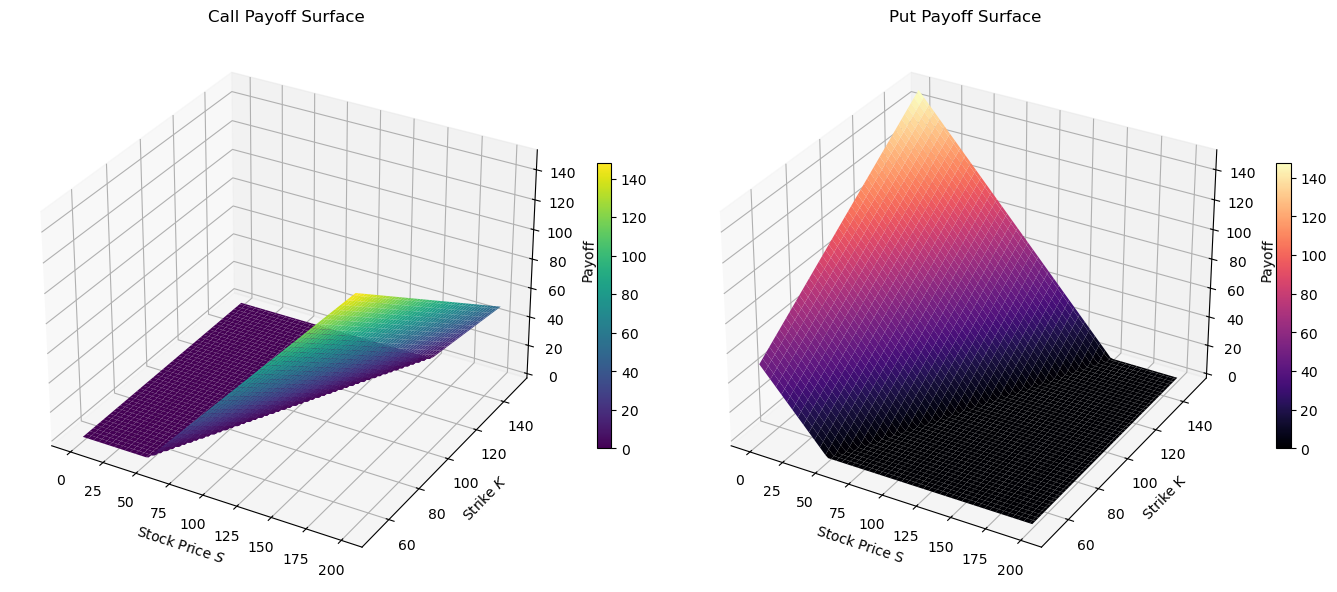

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1) build a grid of S and K
S = np.linspace(0, 200, 100)
K = np.linspace(50, 150, 100)
S_grid, K_grid = np.meshgrid(S, K)

# 2) compute payoffs
call_payoff = np.maximum(S_grid - K_grid, 0)
put_payoff = np.maximum(K_grid - S_grid, 0)

# 3) plot
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(121, projection="3d")
surf = ax.plot_surface(S_grid, K_grid, call_payoff, cmap="viridis", edgecolor="none")
ax.set_title("Call Payoff Surface")
ax.set_xlabel("Stock Price $S$")
ax.set_ylabel("Strike $K$")
ax.set_zlabel("Payoff")
fig.colorbar(surf, ax=ax, shrink=0.5)

ax = fig.add_subplot(122, projection="3d")
surf = ax.plot_surface(S_grid, K_grid, put_payoff, cmap="magma", edgecolor="none")
ax.set_title("Put Payoff Surface")
ax.set_xlabel("Stock Price S")
ax.set_ylabel("Strike K")
ax.set_zlabel("Payoff")
fig.colorbar(surf, ax=ax, shrink=0.5)

plt.tight_layout()
plt.show()

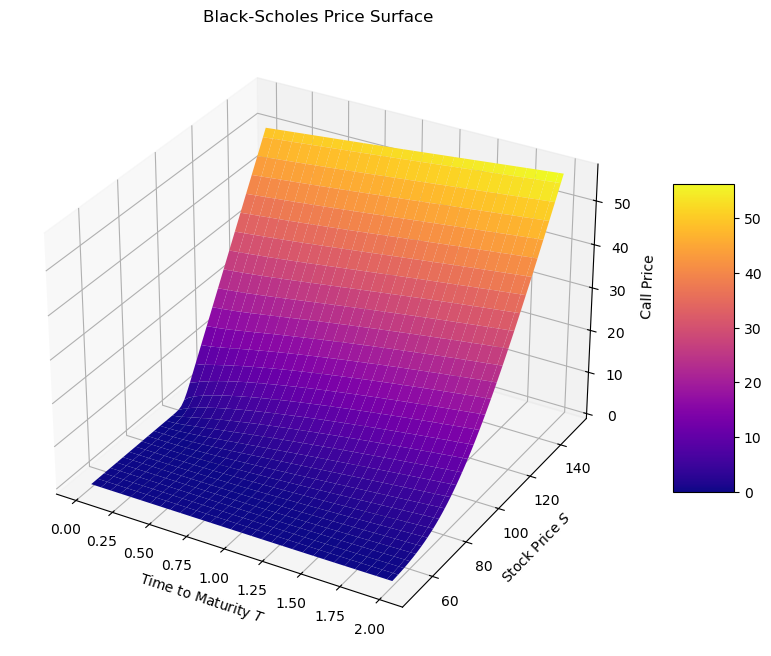

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from src.data.generate import generate_european_vanilla

# 1) generate BS prices on an (S, T) grid
S_vals = np.linspace(50, 150, 60)
T_vals = np.linspace(0.01, 2.0, 60)

df = generate_european_vanilla(
    Option_types=["call"],
    S_values=list(S_vals),
    K_values=[100],
    T_values=list(T_vals),
    r_values=[0.05],
    sigma_values=[0.2],
    q_values=[0.01],
    n_paths=0, 
)


# 2) reshape into surface form
df = df[df["option_type"] == "call"]
surface = df.pivot_table(
    index="T", columns="S", values="bs_price"
)

S_grid, T_grid = np.meshgrid(surface.index, surface.columns, indexing="ij")
Z = surface.values

# 3) plot BS price surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(S_grid, T_grid, Z, cmap="plasma", edgecolor="none")
ax.set_ylabel("Stock Price $S$")
ax.set_xlabel("Time to Maturity $T$")
ax.set_zlabel("Call Price")
ax.set_title("Black-Scholes Price Surface")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

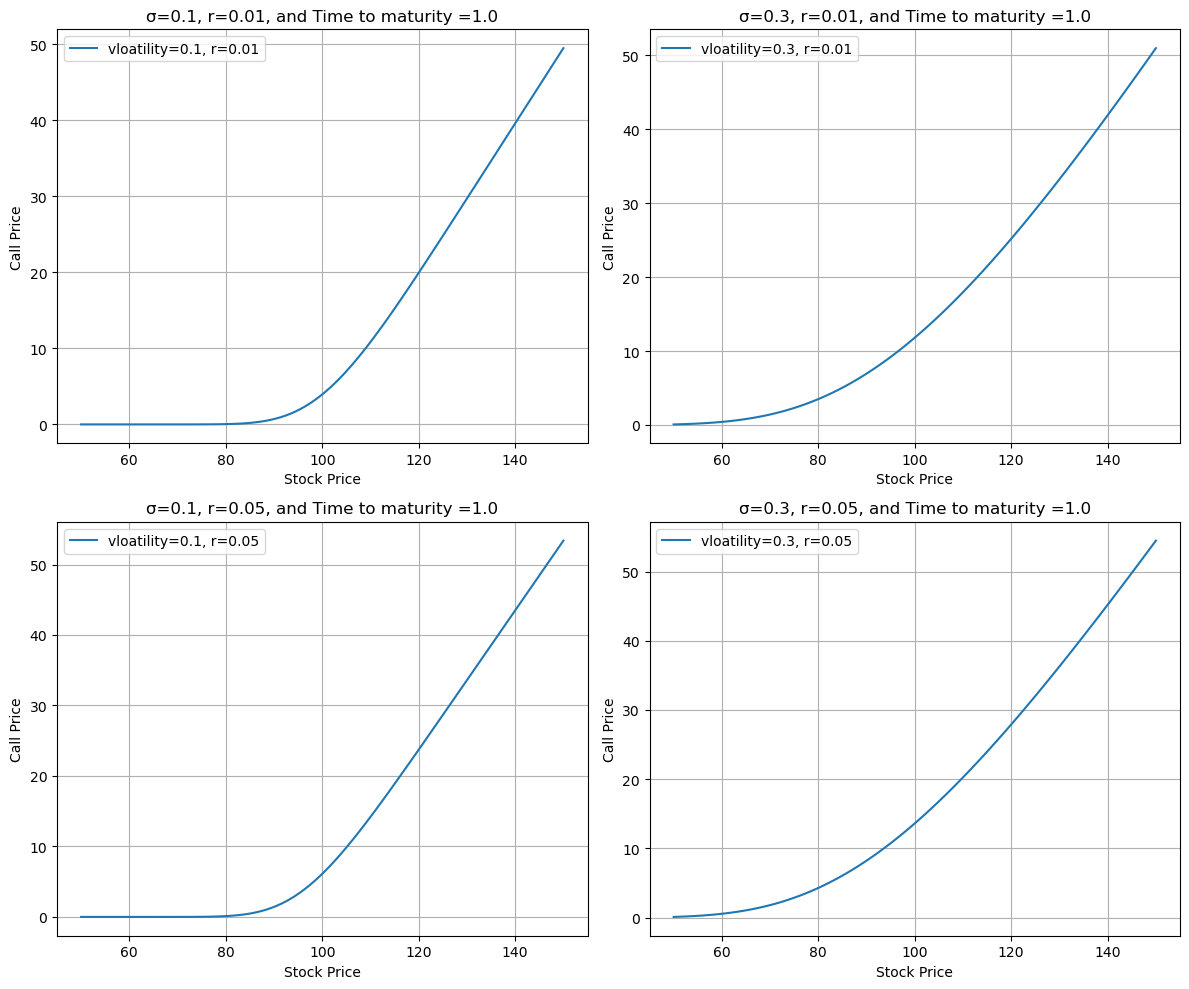

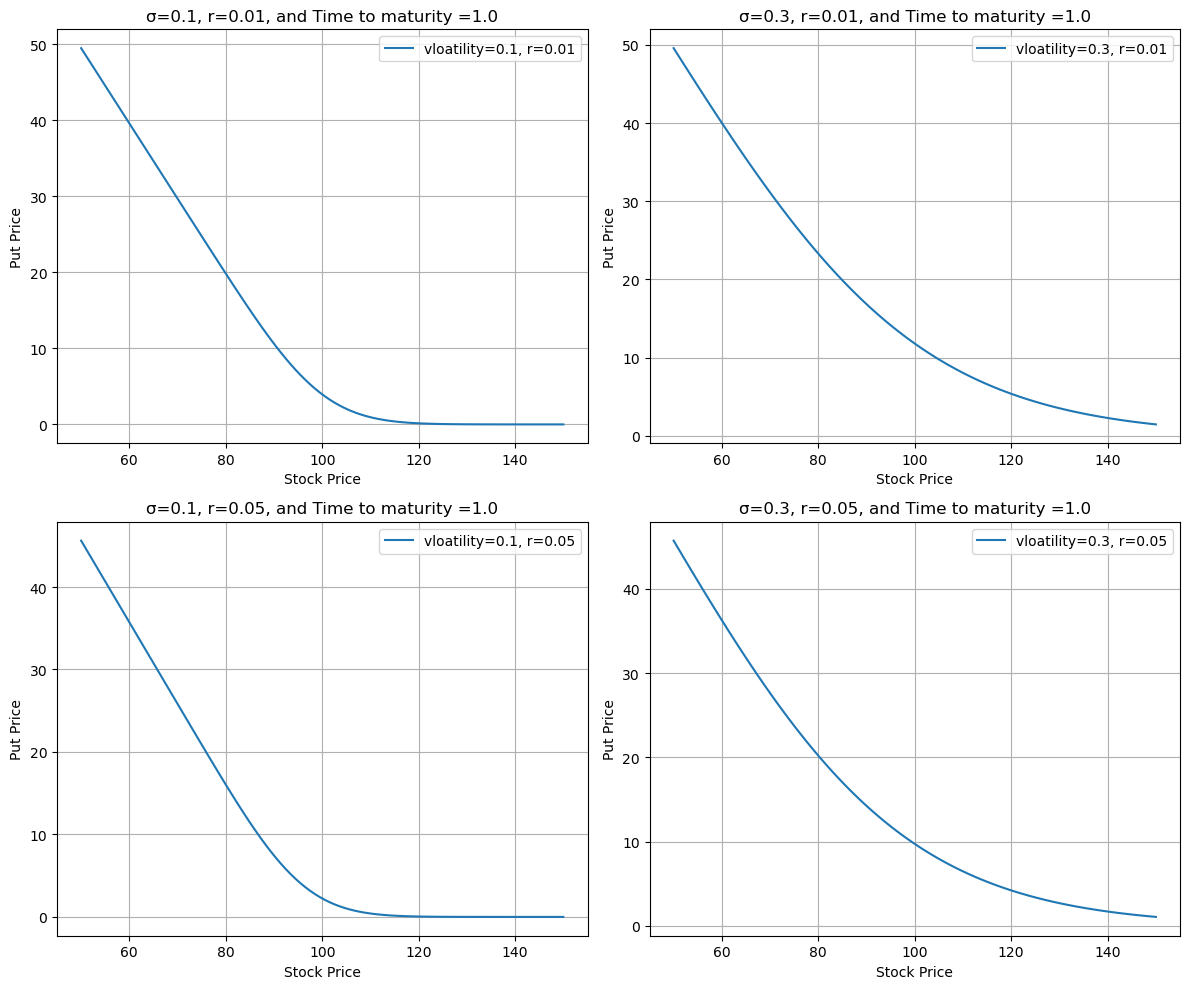

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from src.data.generate import generate_european_vanilla

# param gird
S_vals = list(np.linspace(50, 150, 100))
K = 100
T = 1.0
q = 0.01
scenarios_volatility_interest = [
    (0.1, 0.01),
    (0.3, 0.01),
    (0.1, 0.05),
    (0.3, 0.05),
]


for option_type in ["call", "put"]:

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()

    for ax, (sigma, r) in zip(axes, scenarios_volatility_interest):
        df = generate_european_vanilla(
            Option_types=[option_type],
            S_values=S_vals,
            K_values=[K],
            T_values=[T],
            r_values=[r],
            sigma_values=[sigma],
            q_values=[q],
            n_paths=0,
        )

        df = df[df["option_type"] == option_type].sort_values("S")

        ax.plot(df["S"], df["bs_price"], label=f"vloatility={sigma}, r={r}")
        ax.set_xlabel("Stock Price")
        ax.set_ylabel(f"{option_type.capitalize()} Price")
        ax.set_title(f"σ={sigma}, r={r}, and Time to maturity ={T}")
        ax.grid(True)
        ax.legend()

    plt.tight_layout()
    plt.show()